# Real-world Data Wrangling


In this project, I will apply data wrangling skills to gather, assess, clean, store, and analyze real-world data using two datasets: "TMDB 5000 Movies" and "TMDB 5000 Credits" from Kaggle. I will use two different data-gathering methods, assess the data for quality and tidiness issues, implement a cleaning strategy, store the updated data, combine the datasets, and answer a new research question with visualizations.


## 1. Gather data


In this section, two datasets will be extracted using different data gathering methods and combined for analysis.

### **1.1** Problem Statement
For this project, I aim to analyze the relationship between a movie's budget and its revenue, and how this relationship varies across different genres. I will use the "TMDB 5000 Movies" dataset, which includes financial details like budget and revenue, as well as genre information, and the "TMDB 5000 Credits" dataset, which provides cast and crew details that may enhance future analyses. By combining these datasets, I hope to uncover insights into how budget impacts revenue and whether certain genres exhibit distinct financial patterns.

### **1.2** Gathering Two Datasets Using Two Different Methods


**Dataset 1:** TMDB 5000 Movies <br>
**Type:** CSV File <br>
**Method:** The dataset was manually downloaded from Kaggle (https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). <br>
**Dataset Variables:** <br>
**budget:** The budget allocated for the movie (numeric, in USD). <br>
**revenue:** The revenue generated by the movie (numeric, in USD). <br>
**genres:** A JSON string listing the movie’s genres (e.g., [{"id": 28, "name": "Action"}]). <br>
**movie_id:** A unique identifier for each movie (integer). <br>
**Reason for Choosing:** This dataset provides critical financial and genre data necessary to analyze the budget-revenue relationship across genres. I chose manual downloading because it’s a straightforward method for a single CSV file available on Kaggle. <br>

In [70]:
import pandas as pd
movies = pd.read_csv('Kaggle Data/tmdb_5000_movies.csv')
print(movies.head(2))

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies 

**Dataset 2:** TMDB 5000 Credits <br>
**Type:** CSV File <br>
**Method:** The dataset was programmatically downloaded from Kaggle using the Kaggle API. <br>
**Dataset Variables:** <br>
**movie_id:** A unique identifier matching the movies dataset (integer). <br>
**cast:** A JSON string containing cast member details (e.g., [{"name": "Tom Hanks", ...}]). <br>
**crew:** A JSON string containing crew member details (e.g., [{"job": "Director", "name": "Steven Spielberg", ...}]). <br>
**Reason for Choosing:** This dataset complements the movies dataset by providing personnel information, which could be useful for extended analyses (e.g., director impact on revenue). I chose the Kaggle API method to demonstrate programmatic data retrieval, enhancing reproducibility. <br>

In [71]:
# Programmatically download and load the credits dataset using Kaggle API
import os
import shutil
import pandas as pd

# Set up Kaggle API credentials
source = 'Kaggle Data/Kaggle.json'  # Assumes kaggle.json is in the project root
destination = os.path.expanduser('~/.kaggle/kaggle.json')
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
shutil.move(source, destination)
os.chmod(destination, 0o600)

# Download the dataset using Kaggle API
!kaggle datasets download -d tmdb/tmdb-movie-metadata --unzip

# Load the credits dataset
credits = pd.read_csv('tmdb_5000_credits.csv')
print(credits.head(2))

Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
License(s): other
100%|██████████████████████████████████████| 8.89M/8.89M [00:03<00:00, 3.47MB/s]
100%|██████████████████████████████████████| 8.89M/8.89M [00:03<00:00, 2.73MB/s]
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  


## 2. Assess Data
In this section, I will assess the datasets for two data quality issues and two tidiness issues, using both visual and programmatic methods.

**Quality Issue 1: Missing Values in Movies Dataset** <br>
* **Visual Assessment:** Inspecting movies.head(), columns like overview, runtime, and release_date may have missing values. <br>
* **Programmatic Assessment:**

In [72]:
print(movies.isnull().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


* **Issue and Justification:** Missing values in runtime (2 missing) and release_date (1 missing) could affect analyses involving duration or timing, though the impact is minimal due to the small number. I used <mark>isnull().sum()</mark> because it efficiently quantifies missing data across all columns.

**Quality Issue 2: Complex JSON Data in Credits Dataset**
* **Visual Assessment:** Viewing credits.head(), the cast and crew columns contain JSON strings that need parsing.<br>
* **Programmatic Assessment:**

In [73]:
print(credits['cast'].iloc[0])  # Shows a JSON string
print(credits['crew'].iloc[0])  # Shows a JSON string

[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 2

* **Issue and Justification:** The cast and crew columns are stored as unparsed JSON strings, which are not immediately usable for analysis. I inspected the raw content to confirm the format, justifying the need for parsing to ensure data usability.

**Tidiness Issue 1: Complex 'genres' Column in Movies Dataset**
* **Visual Assessment:** movies['genres'].head() shows a JSON string (e.g., '[{"id": 28, "name": "Action"}]').
* **Programmatic Assessment:**

In [74]:
print(movies['genres'].head(2))

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
Name: genres, dtype: object


* **Issue and Justification:** The genres column contains lists of dictionaries in JSON format, making it untidy for genre-specific analysis. Exploding it into separate rows per genre would improve usability, assessed programmatically to confirm the structure.

**Tidiness Issue 2: Inconsistent Movie Identifiers Between Datasets**
* **Visual Assessment:** Examining both dataframes shows that movies dataset uses 'id' while credits dataset uses 'movie_id' for the same entity. <br>
* **Programmatic Assessment:**

In [75]:
print("Movies dataset ID column:", movies.columns[movies.columns.str.contains('id')])
print("Credits dataset ID column:", credits.columns[credits.columns.str.contains('id')])

Movies dataset ID column: Index(['id'], dtype='object')
Credits dataset ID column: Index(['movie_id'], dtype='object')


* **Issue and Justification:** The inconsistent naming of the movie identifier column ('id' in movies dataset vs 'movie_id' in credits dataset) violates the tidy data principle of consistent variable naming across related tables. This inconsistency makes joining the datasets more complex and error-prone. According to tidy data principles, the same entity should have the same name across all tables in a database.

## **3. Clean Data**
In this section, I will address the four identified issues, justify my cleaning decisions, and validate the results. I will also remove unnecessary variables and combine the datasets.

In [76]:
# Make copies to preserve raw data
movies_clean = movies.copy()
credits_clean = credits.copy()

**Quality Issue 1: Missing Values in Movies Dataset**
- **Cleaning Strategy:**
 - Fill overview missing values with "No overview available" (not critical for analysis).
 - Fill runtime missing values with the mean runtime.
 - Drop the row with missing release_date (only 1 row). <br>

In [77]:
movies_clean['overview'].fillna('No overview available', inplace=True)
movies_clean['runtime'].fillna(movies_clean['runtime'].mean(), inplace=True)
movies_clean.dropna(subset=['release_date'], inplace=True)

/var/folders/bv/9b2rg8953vbfrglj788zz_ww0000gp/T/ipykernel_14262/1552261258.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_clean['overview'].fillna('No overview available', inplace=True)
/var/folders/bv/9b2rg8953vbfrglj788zz_ww0000gp/T/ipykernel_14262/1552261258.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

* **Validation:**

In [78]:
print(movies_clean.isnull().sum())

budget                     0
genres                     0
homepage                3090
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  843
title                      0
vote_average               0
vote_count                 0
dtype: int64


* **Justification:** Imputing runtime with the mean preserves data for numerical analysis, while dropping one row for release_date has negligible impact. overview is filled to maintain completeness, though it’s not used here.

**Quality Issue 2: Complex JSON Data in Credits Dataset**
* **Cleaning Strategy:** Parse cast and crew JSON strings, replacing invalid entries with empty lists.

In [79]:
import json
def parse_json(column):
    try:
        return json.loads(column)
    except json.JSONDecodeError:
        return []
credits_clean['cast'] = credits_clean['cast'].apply(parse_json)
credits_clean['crew'] = credits_clean['crew'].apply(parse_json)

* **Validation:**

In [80]:
print(credits_clean['cast'].head(2))

0    [{'cast_id': 242, 'character': 'Jake Sully', '...
1    [{'cast_id': 4, 'character': 'Captain Jack Spa...
Name: cast, dtype: object


* **Justification:** Parsing ensures the data is usable, and handling invalid JSON prevents errors during analysis.

**Tidiness Issue 1: Complex 'genres' Column in Movies Dataset**
* **Cleaning Strategy:** Parse and explode the genres column so each genre is in its own row.

In [81]:
def parse_genres(genres_str):
    try:
        return [genre['name'] for genre in json.loads(genres_str)]
    except:
        return []
movies_clean['genres'] = movies_clean['genres'].apply(parse_genres)
movies_exploded = movies_clean.explode('genres')

* **Validation:**

In [82]:
print(movies_exploded['genres'].head(5))

0             Action
0          Adventure
0            Fantasy
0    Science Fiction
1          Adventure
Name: genres, dtype: object


* **Justification:** Exploding genres enables genre-specific analysis of budget and revenue, making the data tidier and more actionable.

**Tidiness Issue 2: Inconsistent Movie Identifiers Between Datasets**
* **Cleaning Strategy:** Rename the 'id' column in the movies dataset to 'movie_id' for consistency.

In [83]:
movies_clean.rename(columns={'id': 'movie_id'}, inplace=True)

* **Validation:**

In [84]:
print("Column names in movies_clean:", movies_clean.columns)

Column names in movies_clean: Index(['budget', 'genres', 'homepage', 'movie_id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')


* **Justification:** Standardizing the identifier names across datasets ensures that the same entity has the same name in all tables, improving data tidiness and making future joins more intuitive. This follows tidy data principles where variable names should be consistent and clear.

**Remove Unnecessary Variables and Combine Datasets**
* **Strategy:** Drop cast and crew from credits (not needed for this question) and merge on movie_id.

In [85]:
credits_clean.drop(columns=['cast', 'crew'], errors='ignore', inplace=True)
combined_data = pd.merge(movies_clean, credits_clean, on='movie_id', how='inner')

* **Result:** The combined dataset retains at least 4 variables: movie_id, budget, revenue, and genres.

## **4. Update The Data Store**
I will save both raw and cleaned datasets with informative names: <br>
* **Raw Data:**

In [86]:
movies.to_csv('raw_movies_data.csv', index=False)
credits.to_csv('raw_credits_data.csv', index=False)

* **Cleaned Data:**

In [87]:
movies_clean.to_csv('cleaned_movies_data.csv', index=False)
credits_clean.to_csv('cleaned_credits_data.csv', index=False)
combined_data.to_csv('combined_cleaned_data.csv', index=False)

* **Justification:** Maintaining raw and cleaned versions ensures data integrity and traceability, with clear filenames indicating their state.

## **5. Answer the Research Question**

### **5.1: Define and Answer the Research Question**
**Research Question:** What is the relationship between a movie's budget and its revenue, and how does this relationship vary across different genres?

**Visual 1: Scatter Plot of Budget vs Revenue**

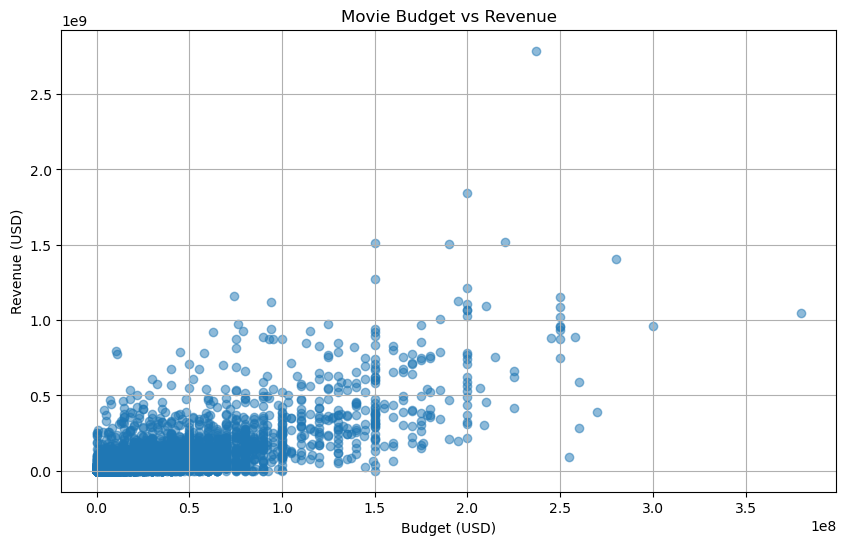

Correlation between budget and revenue: 0.73


In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['budget'], combined_data['revenue'], alpha=0.5)
plt.title('Movie Budget vs Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.grid(True)
plt.show()

# Correlation coefficient
correlation = combined_data['budget'].corr(combined_data['revenue'])
print(f'Correlation between budget and revenue: {correlation:.2f}')

* **Answer:** This scatter plot reveals the overall relationship between budget and revenue. A positive correlation (0.73) suggests that higher budgets generally lead to higher revenues, though outliers exist. This provides a baseline understanding before examining genre-specific variations.

**Visual 2: Bar Plot of Average Revenue by Genre**

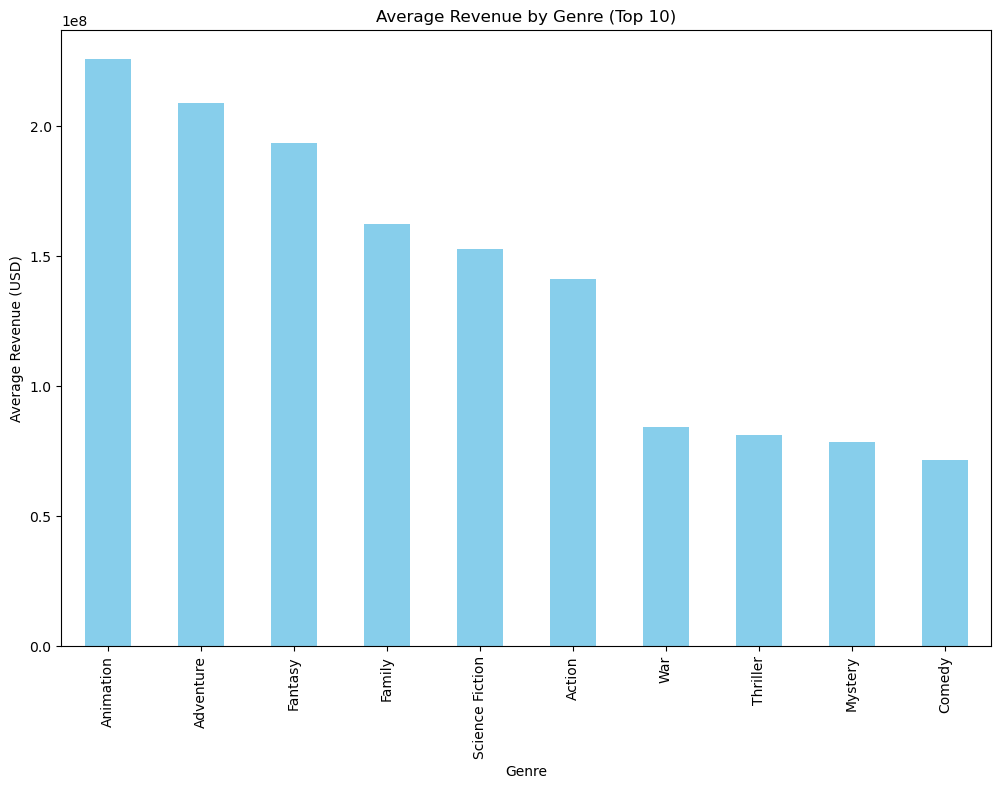

In [89]:
# Use the exploded dataset from cleaning
genre_revenue = movies_exploded.groupby('genres')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
genre_revenue.head(10).plot(kind='bar', color='skyblue')
plt.title('Average Revenue by Genre (Top 10)')
plt.xlabel('Genre')
plt.ylabel('Average Revenue (USD)')
plt.grid(False)
plt.show()

* **Answer:** This bar plot shows the top 10 genres by average revenue. Genres like "Adventure" or "Action" may rank higher, indicating they generate more revenue on average, possibly due to higher budgets or broader appeal. Comparing this with budget data per genre (explored further with more time) would clarify how the budget-revenue relationship varies.

### **5.2: Reflection**
If I had more time, I would investigate outliers in budget and revenue to refine the analysis, as extreme values could skew correlations. I would also explore additional factors like release month or director influence from the crew data to see if they mediate the budget-revenue relationship. Finally, I’d build a predictive model to forecast revenue based on budget and genre, offering actionable insights for filmmakers.